<a href="https://colab.research.google.com/github/thrcle/ML2022_class/blob/main/lab2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Lab Session 2

This material is for educational uses only. Some contents are based on the material provided by other paper/book authors and may be copyrighted by them. 

**Note**: certain details are missing or ambiguous on purpose, in order to test your knowledge on the related materials. However, if you really feel that something essential is missing and cannot proceed to the next step, then contact the teaching staff with clear description of your problem.

### Submitting your work:
- <font color=red>**DO NOT clear the final outputs**</font> so that TAs can grade both your code and results.
- Commit the `.ipynb` file on your github repository and submit URL on E-Ruri

## Load `diabetes` dataset for Linear Regression

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [3]:
# Show data size
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))

print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X: (442, 1)
y: (442,)
X_train: (422, 1)
y_train: (422,)
X_test: (20, 1)
y_test: (20,)


### <font color=blue>[Lab #2-1]</font>  Linear regression with sklearn (20 points)

Use **linear_model** from Scikit-Learn [[reference](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)]

In [4]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

# create model  
sk_lin_regr = linear_model.LinearRegression()
# train model
sk_lin_regr.fit(X_train, y_train)
print('SK Parameters: %.4f, %.4f' %
      (sk_lin_regr.intercept_, np.squeeze(sk_lin_regr.coef_, axis=0)))

# inferece with train data
y_train_pred = sk_lin_regr.predict(X_train)
print('SK train MSE: %.4f' %
      mean_squared_error(y_train, y_train_pred) )

# inferece with test data
y_test_pred = sk_lin_regr.predict(X_test)
print('SK test MSE: %.4f' %
      mean_squared_error(y_test, y_test_pred) )

SK Parameters: 152.9189, 938.2379
SK train MSE: 3955.0199
SK test MSE: 2548.0724


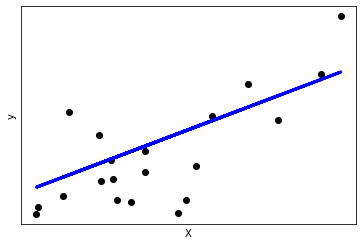

In [5]:
# plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.xticks(())
plt.yticks(())

plt.show()

### <font color=blue>[Lab #2-2]</font> Linear regression without sklearn (20 points)
1. Complete the following class definition.  
2. You can write your code only within the marked with comments.

**[hint]** You can use `np.linalg.inv` for inverse and `np.matmul` for matrix multiplication.
$$
\mathbf{X}^\dagger = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top
\\
\mathbf{w}_{\textrm{lin}}=\mathbf{X}^\dagger y
$$

In [22]:
np.matmul(np.linalg.inv(np.matmul(X.T,X)), X.T)

array([[ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
        -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
        -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
        -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
        -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
        -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
         0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
        -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
        -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
        -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
        -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
        -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
        -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
        -0.02452876, -0.01806189, -0.01482845, -0.0

In [29]:
from numpy.linalg import inv

class LinearRegression():
    def fit(self, X, y):
        #linear regression
        self.X_psuedo_inv = np.matmul(np.linalg.inv(np.matmul(X.T,X)), X.T)
        self.w = np.matmul(self.X_psuedo_inv,y)

    def predict(self, X):
        return  X @ self.w
    
    def get_weights(self):
        return self.w

Extend $\mathbf{X}$ with $\mathbf{1}_d=(1,1,…,1)∈\mathbb{R}^d$ using `add_one_column` method which we used in Lab 1.
$$
\mathbf{X} = \begin{bmatrix} x_1 \\
x_2 \\
\vdots  \\
x_d \\
\end{bmatrix}
\Rightarrow
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots  & \vdots  \\
1 & x_d \\
\end{bmatrix}
$$

By using X, you should compute optimal weight, `w_lin`.

**[hint]** compute pseudo-inverse of $\mathbf{X}$

In [30]:
def add_one_column(data):
    # number of data records
    N = len(data) 

    # add column of ones for x_0
    return np.c_[np.ones(N), data] 

In [31]:
X_train_extended = add_one_column(X_train)
X_test_extended = add_one_column(X_test)
print('X_train_extneded: ', str(X_train_extended.shape))
print('X_test_extneded: ', str(X_test_extended.shape))

X_train_extneded:  (422, 2)
X_test_extneded:  (20, 2)


In [32]:
# create model
np_lin_regr = LinearRegression()

# train model
np_lin_regr.fit(X_train_extended, y_train)

print('Numpy Parameters: %.4f, %.4f' %
      (np_lin_regr.get_weights()[0], np_lin_regr.get_weights()[1]))

Numpy Parameters: 152.9189, 938.2379


In [33]:
# inferece with train data
y_train_pred = np_lin_regr.predict(X_train_extended)
print('NP train MSE: %.4f' %
      mean_squared_error(y_train, y_train_pred) )

# inferece with test data
y_test_pred = np_lin_regr.predict(X_test_extended)
print('NP test MSE: %.4f' %
      mean_squared_error(y_test, y_test_pred) )

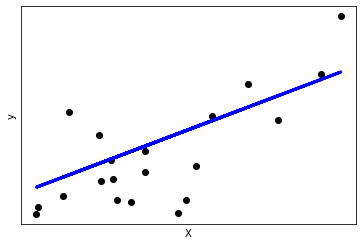

In [35]:
# plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)

plt.xlabel('X')
plt.ylabel('y')

plt.xticks(())
plt.yticks(())

plt.show()

## Load `breast_cancer` data for Logistic Regression

In [36]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data[:, [0, 6]]
y = data.target

# show data size
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))

X: (569, 2)
y: (569,)


Split data into train and test set.

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Show data size
print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))

print('X_test: ' + str(X_test.shape))
print('y_test: ' + str(y_test.shape))

X_train: (381, 2)
y_train: (381,)
X_test: (188, 2)
y_test: (188,)


### <font color=blue>[Lab #2-3]</font> Logisitic regression with sklearn (20 points)
Use **linear_model** from Scikit-Learn.

In [39]:
# create model
sk_logis_regr = linear_model.LogisticRegression()   ############################

# train model
sk_logis_regr.fit(X_train, y_train)

print('SK Parameters: %.4f, %.4f, %.4f' %
      (sk_logis_regr.intercept_,
       sk_logis_regr.coef_[0, 0], sk_logis_regr.coef_[0, 1]))

SK Parameters: 12.9441, -0.8589, -2.7129


In [40]:
from sklearn.metrics import accuracy_score

# inferece with train data
y_train_pred = sk_logis_regr.predict(X_train)
print('SK train accuracy: %.4f' %
      accuracy_score(y_train, y_train_pred) )

# inferece with test data
y_test_pred = sk_logis_regr.predict(X_test)
print('SK test accuracy: %.4f' %
      accuracy_score(y_test, y_test_pred) )

SK train accuracy: 0.8714
SK test accuracy: 0.9149


### <font color=blue>[Lab #2-4]</font> Logisitic regression with PyTorch (20 points)


Import `PyTorch` packages

In [41]:
import torch

Convert data into `Tensor`, the inherence data type for `Pytorch`.

In [42]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

Define LogisiticRegression with [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) and [`torch.nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html?highlight=sigmoid#torch.sigmoid).

In [44]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2,1)  ## writing 2,1
        self.sigmoid = torch.nn.Sigmoid()  ## writing
    
    def forward(self, x):
        signal = self.linear(x)
        prob = self.sigmoid(signal)
        return prob

In [45]:
# set hyper-parameter
NUM_EPOCH = 20000
LEARNING_RATE = 0.1

Construct your learning precedure

1.   Create model with your own model class `LogisticRegression`
2.   Define error term with Binary Cross Entropy [[ref](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)]
3.   Define optimizer with Stochastic Gradient Descent [[ref](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html?highlight=sgd#torch.optim.SGD)]



In [56]:
# create model
torch_logis_regr =LogisticRegression()

# define error term
criterion = torch.nn.BCELoss()

# define optimizer technique 
optimizer = torch.optim.SGD(torch_logis_regr.parameters(),LEARNING_RATE)

In [57]:
for epoch in range(NUM_EPOCH):
    # inference
    prob = torch_logis_regr(X_train_tensor)

    # compute loss
    loss = criterion(prob.squeeze(), y_train_tensor)
   
    # remove previous gradient  # 초기화 
    optimizer.zero_grad()
    
    # compute gradient
    loss.backward()

    # run optimizer
    optimizer.step()

    if not (epoch % 500):
      print('epoch [%5d / %5d] %.4f' %
            (epoch, NUM_EPOCH, loss.item()))

epoch [    0 / 20000] 0.8022
epoch [  500 / 20000] 1.4686
epoch [ 1000 / 20000] 1.5648
epoch [ 1500 / 20000] 1.2021
epoch [ 2000 / 20000] 0.3279
epoch [ 2500 / 20000] 0.2878
epoch [ 3000 / 20000] 0.2855
epoch [ 3500 / 20000] 0.2833
epoch [ 4000 / 20000] 0.2811
epoch [ 4500 / 20000] 0.2791
epoch [ 5000 / 20000] 0.2771
epoch [ 5500 / 20000] 0.2752
epoch [ 6000 / 20000] 0.2734
epoch [ 6500 / 20000] 0.2716
epoch [ 7000 / 20000] 0.2699
epoch [ 7500 / 20000] 0.2683
epoch [ 8000 / 20000] 0.2667
epoch [ 8500 / 20000] 0.2652
epoch [ 9000 / 20000] 0.2637
epoch [ 9500 / 20000] 0.2623
epoch [10000 / 20000] 0.2609
epoch [10500 / 20000] 0.2596
epoch [11000 / 20000] 0.2583
epoch [11500 / 20000] 0.2571
epoch [12000 / 20000] 0.2559
epoch [12500 / 20000] 0.2548
epoch [13000 / 20000] 0.2537
epoch [13500 / 20000] 0.2526
epoch [14000 / 20000] 0.2516
epoch [14500 / 20000] 0.2506
epoch [15000 / 20000] 0.2496
epoch [15500 / 20000] 0.2487
epoch [16000 / 20000] 0.2478
epoch [16500 / 20000] 0.2470
epoch [17000 /

In [58]:
# inferece with train data
y_train_prob = torch_logis_regr(X_train_tensor)
y_train_pred = y_train_prob > 0.5
print('Torch train accuracy: %.4f' %
      accuracy_score(y_train, y_train_pred) )

# inferece with test data
y_test_prob = torch_logis_regr(X_test_tensor)
y_test_pred = y_test_prob > 0.5
print('Torch train accuracy: %.4f' %
      accuracy_score(y_test, y_test_pred) )

Torch train accuracy: 0.9003
Torch train accuracy: 0.9255
